In [14]:
from pathlib import Path
import itertools

import numpy as np
# https://matplotlib.org/gallery/lines_bars_and_markers/curve_error_band.html#sphx-glr-gallery-lines-bars-and-markers-curve-error-band-py
from scipy.interpolate import splprep, splev


import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import cmocean
import cartopy
import cartopy.crs as ccrs

from matplotlib import rcParams 

from datetime import datetime, timedelta
from urllib.request import urlopen
from netCDF4 import Dataset
from datetime import datetime, timedelta
from urllib.request import urlopen

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt


import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from metpy.units import masked_array, units
from netCDF4 import Dataset

import themepy
paper_path = Path('../paper/figures/')
slide_path = Path('../slides/figures/math/')
proposal_path = Path('../draft/figures/math/')
theme = themepy.Theme('paper')
rcParams['font.family'] = 'Segoe Print'
rcParams['figure.dpi'] = 200
%matplotlib inline

In [15]:
facecolor = '#F2EBDF'
fc = '#FEF7F9'
ecolor = '#248EA6'
fcolor= '#F24B88'
fcolor = '#E30B5C'
kcolor = '#021859'
pcolor = 'darkgray'
tcolor = 'dimgray'
acolor = '#0099CC'
acolor = '#002942'
acolor = 'C4'
mc = 'C2'
ssize = 18
lsize = 16

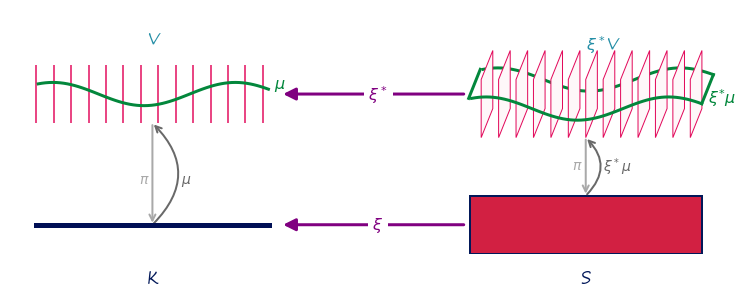

In [16]:
fig, axd  = plt.subplot_mosaic([['k', 's']], figsize=(12, 4), 
                                    constrained_layout=True)

xpos = [.1, .9]
x = np.linspace(-2*np.pi, np.pi*2, 1000)
inds = ((x>xpos[0]) & (x<xpos[-1]))
xin = x[inds]
mu = np.sin(xin*10)*.04 +.5
y = np.cos(xin*10)*.03+.2
mid = xpos[0] + (xpos[-1]-xpos[0])/2

axd['k'].vlines(np.arange(xpos[0], xpos[-1],.06), ymin=.45, ymax=.65, color=fcolor)
axd['k'].axhline(0.1, xmin=xpos[0], xmax=xpos[-1], lw=5)
axd['k'].text(mid, -.05,'K', ha='center', va='top', color=kcolor, fontsize=16)

axd['k'].plot(xin, mu+.05, mc, linewidth=3, zorder=10)
axd['k'].annotate(r'$\mu$', (xpos[-1]+.02, mu[-1]+.05), fontsize=16, color=mc)
axd['k'].annotate("V", (mid ,.7), ha='center', va='bottom', fontsize=16, color=ecolor)
axd['k'].set(aspect='equal', ylim=(0,.85), xlim=[0,1])

tx = .25
ark = mpatches.FancyArrowPatch((mid, .45), (mid, .1), arrowstyle='->', color=pcolor,
                               mutation_scale=15, linewidth=2, transform=axd['k'].transData)
axd['k'].add_patch(ark)
axd['k'].text(mid-.01, tx, r'$\pi$', ha='right', va='center', color=pcolor, fontsize=14)

art = mpatches.FancyArrowPatch( (mid, .1), (mid, .45), arrowstyle='->', color=tcolor,
                               mutation_scale=15, connectionstyle='arc3,rad=.5',  
                               linewidth=2, transform=axd['k'].transData)
axd['k'].add_patch(art)
axd['k'].text(mid+.1, tx, r'$\mu$', ha='left', va='center', color=tcolor, fontsize=14)

#axd['s'].plot(x[inds], y, color='C1', linewidth=4)

for off in np.arange(.04,.78,.06):
    verts = np.array([[.1, .4], [.1,.6], [.14, .7], [.14, .5], [.1, .6 ]]) + [off, 0]
    p = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor=fcolor,
                                      facecolor=fc)
    axd['s'].add_patch(p)
    

axd['s'].plot(xin, mu, mc, linewidth=3)
axd['s'].plot(xin+.04, mu+.1, color=mc, zorder=-2, linewidth=3)
axd['s'].plot([xin[0]-.01, xin[0]+.03], [mu[0], mu[0]+.1], color=mc, linewidth=3)
axd['s'].plot([xin[-1], xin[-1]+.04], [mu[-1], mu[-1]+.1], color=mc, linewidth=3)
axd['s'].annotate(r'$\xi^{*}\mu$', (xpos[-1]+.02, mu[-1]), fontsize=16, color=mc)
axd['s'].annotate(r"$\xi^*$V", (mid,.7), fontsize=16, color=ecolor)

b1 = mpatches.Rectangle((xpos[0], 0), height=.2, width=(xpos[-1]-xpos[0]), 
                        facecolor='C1', edgecolor=kcolor, lw=2)
axd['s'].add_patch(b1)
axd['s'].text(xpos[0]+(xpos[-1]-xpos[0])/2, -.05,'S', 
              ha='center', va='top', color=kcolor, fontsize=16)

axd['s'].set(aspect='equal', ylim=(0,.85), xlim=(0,1))
tx = .3
ark = mpatches.FancyArrowPatch((mid, .4), (mid, .2), arrowstyle='->', color=pcolor,
                               mutation_scale=15, linewidth=2, transform=axd['s'].transData)
axd['s'].add_patch(ark)
axd['s'].text(mid-.01, tx, r'$\pi$', ha='right', va='center', color=pcolor, fontsize=14)

art = mpatches.FancyArrowPatch( (mid, .2), (mid, .4), arrowstyle='->', color=tcolor,
                               mutation_scale=15, connectionstyle='arc3,rad=.5',  
                               linewidth=2, transform=axd['s'].transData)
axd['s'].add_patch(art)
axd['s'].text(mid+.06, tx, r'$\xi^*\mu$', ha='left', va='center', color=tcolor, fontsize=14)


con_ft = mpatches.ConnectionPatch(xyA=(.08,.1), coordsA=axd['s'].transData,
                        xyB=(.95, .1), coordsB=axd['k'].transData,   
                         arrowstyle="-|>", mutation_scale=25,linewidth=3,
                        facecolor=acolor, edgecolor=acolor)
fig.add_artist(con_ft)
fig.text(.51, .23, r'$\xi$', fontsize=16, va='center', ha='center', color=acolor,  bbox={'color':'white'})

con_ft = mpatches.ConnectionPatch(xyA=(.08,.55), coordsA=axd['s'].transData,
                        xyB=(.95, .55), coordsB=axd['k'].transData,   
                         arrowstyle="-|>", mutation_scale=25,linewidth=3,
                        facecolor=acolor, edgecolor=acolor)
fig.add_artist(con_ft)
fig.text(.51, .68, r'$\xi^*$', fontsize=16, va='center', ha='center', color=acolor,  bbox={'color':'white'})

axd['k'].axis('off')
axd['s'].axis('off')
fig.savefig(paper_path/"q_hat.png", bbox_inches='tight', facecolor='white')
fig.savefig(proposal_path/"q_hat.png", bbox_inches='tight', facecolor='white')

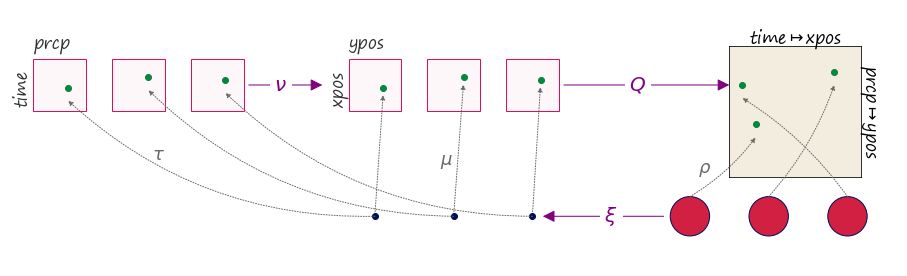

In [17]:
# label the spaces 
fig, axd = plt.subplot_mosaic([['E', 'V', 'H']], figsize=(16,12))
for k in axd:
    axd[k].set(xlim=(0,1), ylim=(0,1), aspect='equal')
    axd[k].axis('off')
    
ac = acolor
oc = tcolor
dc='C2'

yl = .2
xpos = [.2, .5,.8]
s = axd['V'].scatter(xpos, [yl,yl,yl], zorder=100)
yt = [44, 48, 47]
xt = [32,38, 31]
klabs = [r'$k_{1}$', r'$k_{2}$',r'$k_{3}$' ]
slabs = [r'$s_{1}$', r'$s_{2}$',r'$s_{3}$' ]

axsub = axd['H'].inset_axes([.35, .35, .5, .5] )
axsub.set(xticklabels=[], yticklabels=[], ylim=(40,50), xlim=(30,40))
axsub.scatter(xt,yt, color=dc, edgecolor=dc)

for i, (off, kl, sl) in enumerate(zip(xpos, klabs, slabs)):
    verts = np.array([[0, .4], [0,.6], [.2, .6], [.2, .4], [0, .6 ]]) + [off-.1, .2]
    pe = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor=fcolor,
                                      facecolor=fc)
    axd['E'].add_patch(pe)
    
    pv = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor=fcolor,
                                      facecolor=fc)
    axd['V'].add_patch(pv)
    xp = (xt[i]/1000)+off
    yp = (yt[i]/100)+.25
    axd['E'].scatter(xp,yp, zorder=100, color=dc, edgecolor=dc)
    axd['V'].scatter(xp,yp, zorder=100, color=dc, edgecolor=dc)
        
    c = mpatches.Circle((off,yl), radius=.075, edgecolor='C0', facecolor='C1')
    axd['H'].add_patch(c)
   
    
    a1 = mpatches.FancyArrowPatch((off,.2), (xp,yp-.02), arrowstyle="-|>",  
                                  linestyle=':', mutation_scale=10, color=oc)
    axd['V'].add_patch(a1)
    
    a2 = mpatches.ConnectionPatch(xyA=(off,.2), coordsA=axd['V'].transData,
                      xyB=(xp,yp-.05), coordsB=axd['E'].transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=-.2",
                                 linestyle=':', color=oc)
    fig.add_artist(a2)
    
    a3 = mpatches.ConnectionPatch(xyA=(off,.2+.075), coordsA=axd['H'].transData,
                      xyB=(xt[i],yt[i]-1), coordsB=axsub.transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=0.1",
                                 linestyle=':', color=oc)
    fig.add_artist(a3)
    
    
    
a3 = mpatches.ConnectionPatch(xyA=(0.1,yl), coordsA=axd['H'].transData,
                      xyB=(xpos[-1]+.04, yl), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a3)
atext_kw = {'color':ac, 'va':'center', 'ha':'center', 'zorder':10, 'bbox':{'color':'white'}, 'fontsize':20}
fig.text(1.1, a3.xy1[1], r'$\xi$', transform=axd['V'].transData, **atext_kw)

a4 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['E'].transData,
                      xyB=(0, .7), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a4)
fig.text(1.04, .7, r'$\nu$', transform=axd['E'].transData, **atext_kw)

a5 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['V'].transData,
                      xyB=(.35, .7), coordsB=axd['H'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a5)
fig.text(1.2, .7, r'$Q$', transform=axd['V'].transData, **atext_kw)


x0, y0 = verts[0]-[xpos[-1]-xpos[0],-.02]
x1, y1 = verts[1]-[xpos[-1]-xpos[0],-.02]

for (n, xt, yt) in [('E', 'time', 'prcp'), ('V', 'xpos', 'ypos')]:
    axd[n].text(x1, y1, yt, ha='left', va='bottom', fontsize=lsize)
    axd[n].text(x0, y0, xt, ha='right', va='bottom', rotation=90, fontsize=lsize)

axsub.xaxis.set_label_position('top')
axsub.yaxis.set_label_position('right')
axsub.set_xlabel('time'+r'$\mapsto$'+'xpos', fontsize=lsize)
axsub.set_ylabel('prcp'+r'$\mapsto$'+'ypos', rotation=270, labelpad=18, fontsize=lsize)
axsub.set(xticklabels=[], yticklabels=[]) 
axsub.tick_params(length=0)

axd['E'].annotate(r'$\tau$',(0.55, 0.42), color=oc, fontsize=ssize)
axd['V'].annotate(r'$\mu$', (.45, .4), color=oc, fontsize=ssize)
axd['H'].annotate(r'$\rho$', (.23, .37), color=oc, fontsize=ssize)


fig.savefig(slide_path/"scatter.png", bbox_inches='tight', facecolor='white' )
fig.savefig(proposal_path/"scatter.png", bbox_inches='tight', facecolor='white' )

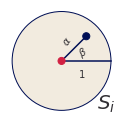

In [5]:
fig, axd = plt.subplot_mosaic([['glyph']], figsize=(2,2))
sc = mpatches.Circle((.5,.5), radius=.3, edgecolor='C0', facecolor=facecolor)
axd['glyph'].add_patch(sc)
axd['glyph'].annotate(r"$S_i$", (.44,0.05), fontsize=16)
axd['glyph'].annotate(r'$s=(\alpha, \beta)$', (.33, .87))
axd['glyph'].plot([.5, .8], [.5, .5], color='C0')
axd['glyph'].plot([.5,.65], [.5, .65], color='C0')
axd['glyph'].scatter([.5, .65], [.5, .65], c=['C1','C0'], s=50, zorder=100)
axd['glyph'].annotate(r'$\alpha$', (.49, .60), rotation=55)
axd['glyph'].annotate(r'$\beta$', (.59, .53), rotation=30)
axd['glyph'].annotate(r'$1$', (.6, .4))
axd['glyph'].axis('off')
axd['glyph'].set_aspect('equal')
axd['glyph'].set_title(r"$S_{i}$", loc='right', y=-0)
fig.savefig(slide_path/"scatter_s.png", bbox_inches='tight', facecolor='white' )
fig.savefig(proposal_path/"scatter_s.png", bbox_inches='tight', facecolor='white' )

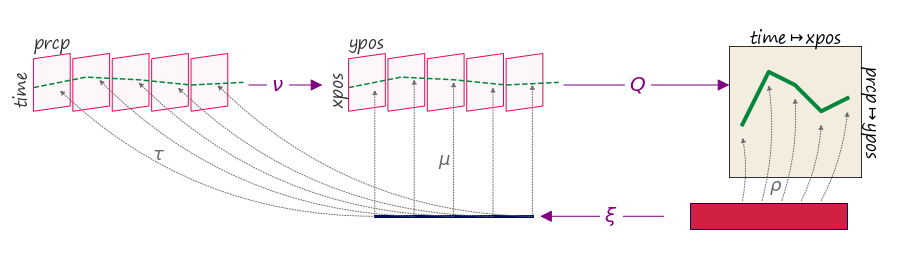

In [6]:

fig, axd = plt.subplot_mosaic([['E', 'V', 'H']], figsize=(16,12))
for k in axd:
    axd[k].set(xlim=(0,1), ylim=(0,1), aspect='equal')
    axd[k].axis('off')
    
yl = .2
xpos = [.2, .8]
s = axd['V'].axhline(yl, xmin=xpos[0], xmax=xpos[-1], linewidth=3, zorder=10)
yt = np.array([44, 48, 47, 45, 46])
xt = np.array([1,3,5,7,9])

r = mpatches.Rectangle((xpos[0], .15), height=.1, width=xpos[1]-xpos[0], 
                        facecolor='C1', edgecolor='C0') 
axd['H'].add_patch(r)
axsub = axd['H'].inset_axes([.35, .35, .5, .5] )
axsub.set(xticklabels=[], yticklabels=[], ylim=(40,50), xlim=(0,10))
axsub.plot(xt,yt, color=dc, linewidth=4)

xp = (xt/10)
yp = (yt/100)+.25


axd['E'].plot(xp,yp, zorder=100, color=dc, linestyle='--')
axd['V'].plot(xp,yp, zorder=100, color=dc, linestyle='--')
#axd['H'].plot(xp[:-1]+.1, yp[:-1]-.52, color='C1', linewidth=3 )

for i, off in enumerate(np.arange(xpos[0], xpos[-1], .15)):
    verts = np.array([[0, .4], [0,.6], [.14, .62], [.14, .42], [0, .6 ]]) + [off-.1, .2]
    pe = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor=fcolor,
                                      facecolor=fc)
    axd['E'].add_patch(pe)
    
    pv = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor=fcolor,
                                      facecolor=fc)
    axd['V'].add_patch(pv)
    
    a1 = mpatches.FancyArrowPatch((off, yl), (off,yp[i]), arrowstyle="-|>",  
                                  linestyle=':', mutation_scale=10, color=oc)
    axd['V'].add_patch(a1)
    
    a2 = mpatches.ConnectionPatch(xyA=(off,yl), coordsA=axd['V'].transData,
                      xyB=(off,yp[i]-.01), coordsB=axd['E'].transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=-.2",
                                 linestyle=':', color=oc)
    fig.add_artist(a2)
    
    a3 = mpatches.ConnectionPatch(xyA=((off/2) + .3,yl+.06), coordsA=axd['H'].transData,
                      xyB=(xt[i],yt[i]-1), coordsB=axsub.transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=0.1",
                                 linestyle=':', color=oc)
    fig.add_artist(a3)
    
    
    
a3 = mpatches.ConnectionPatch(xyA=(0.1,yl), coordsA=axd['H'].transData,
                      xyB=(xpos[-1]+.03, yl), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a3)
atext_kw = {'color':ac, 'va':'center', 'ha':'center', 'zorder':10, 'bbox':{'color':'white'}, 'fontsize':20}
fig.text(1.1, a3.xy1[1], r'$\xi$', transform=axd['V'].transData, **atext_kw)


a4 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['E'].transData,
                      xyB=(0, .7), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a4)
fig.text(1.03, a4.xy1[1], r'$\nu$', transform=axd['E'].transData, **atext_kw)

a5 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['V'].transData,
                      xyB=(.35, .7), coordsB=axd['H'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a5)
fig.text(1.2, a5.xy1[1], r'$Q$', transform=axd['V'].transData, **atext_kw)


for (n, xtx, ytx) in [('E', 'time', 'prcp'), ('V', 'xpos', 'ypos')]:
    axd[n].text(x1, y1, ytx, ha='left', va='bottom', fontsize=lsize)
    axd[n].text(x0, y0, xtx, ha='right', va='bottom', rotation=90, fontsize=lsize)


axsub.xaxis.set_label_position('top')
axsub.yaxis.set_label_position('right')
axsub.set_xlabel('time'+r'$\mapsto$'+'xpos', fontsize=lsize)
axsub.set_ylabel('prcp'+r'$\mapsto$'+'ypos', rotation=270, fontsize=lsize, labelpad=18)
axsub.set(xticklabels=[], yticklabels=[]) 
axsub.tick_params(length=0)

axd['E'].annotate(r'$\tau$',(0.55, 0.42), color=oc, fontsize=ssize)
axd['V'].annotate(r'$\mu$', (.44, .4), color=oc, fontsize=ssize)
axd['H'].annotate(r'$\rho$', (.5, .3), color=oc, fontsize=ssize)


fig.savefig(slide_path/"line.png", bbox_inches='tight', facecolor='white' )
fig.savefig(proposal_path/"line.png", bbox_inches='tight', facecolor='white' )

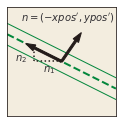

In [7]:
lcolor = '#002559'
lcolor = '#241C1A'
fig, axd = plt.subplot_mosaic([['glyph']], figsize=(2,2))
axd['glyph'].set(ylim=(46.5,48.5), xlim=(4, 6), aspect='equal')
axd['glyph'].plot(xt[1:3]+1, yt[1:3], color=dc, linewidth=2, linestyle='--' )
axd['glyph'].plot(xt[1:3]+1, yt[1:3]-.2, color=dc, linewidth=1)
axd['glyph'].plot(xt[1:3]+1, yt[1:3]+.2, color=dc, linewidth=1)
axd['glyph'].arrow(5.0, 47.5, np.cos(45)*.5, np.sin(45)*.45, width=.04, color=lcolor, zorder=10)
axd['glyph'].arrow(5.0, 47.5, -.5, .25, zorder=10, width=.04, color=lcolor)
axd['glyph'].plot([5, 5-.5], [47.5, 47.5], linestyle=':', color=lcolor)
axd['glyph'].plot([5-.5, 5.-.5], [47.5, 47.5+.25], linestyle=':', color=lcolor)
axd['glyph'].annotate(r'$n_1$', (4.65, 47.3), fontweight='black')
axd['glyph'].annotate(r'$n_2$', (4.15, 47.5), fontweight='black')
axd['glyph'].annotate(r'$n=(-xpos^{\prime}, ypos^{\prime})$', (4.25, 48.25))
axd['glyph'].tick_params(size=0)
axd['glyph'].set(xticks=[], yticks=[])
axd['glyph'].set_aspect('equal')
axd['glyph'].spines[:].set_color(lcolor)

fig.savefig(slide_path/"line_s.png", bbox_inches='tight', facecolor='white' )
fig.savefig(proposal_path/"line_s.png", bbox_inches='tight', facecolor='white' )

In [8]:
dt = datetime.utcnow() - timedelta(days=1)  # This should always be available
dt = datetime(2020, 6,7)
url = 'http://water.weather.gov/precip/downloads/{dt:%Y/%m/%d}/nws_precip_1day_'\
      '{dt:%Y%m%d}_conus.nc'.format(dt=dt)
data = urlopen(url).read()

nc = Dataset('data', memory=data)

prcpvar = nc.variables['observation']
data = masked_array(prcpvar[:], units(prcpvar.units.lower())).to('mm')
dx = nc.variables['x'][:]
dy = nc.variables['y'][:]
proj_var = nc.variables[prcpvar.grid_mapping]

globe = ccrs.Globe(semimajor_axis=proj_var.earth_radius)
proj = ccrs.Stereographic(central_latitude=90.0,
                          central_longitude=proj_var.straight_vertical_longitude_from_pole,
                          true_scale_latitude=proj_var.standard_parallel, globe=globe)

C:\Users\story\Anaconda3\envs\mplrelease\lib\site-packages\numpy\ma\core.py:1021: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [9]:
clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]

In [10]:
nc.variables.keys()

dict_keys(['time', 'crs', 'observation', 'normal', 'departure_from_normal', 'percent_of_normal', 'x', 'y'])

In [11]:
cmap = cmocean.cm.rain
norm = mcolors.BoundaryNorm(clevs, cmap.N)
cmap.set_under('white')

<ipython-input-12-e47968a5d746>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = axsub.pcolormesh(dx, dy, data, cmap=cmap, norm=norm)


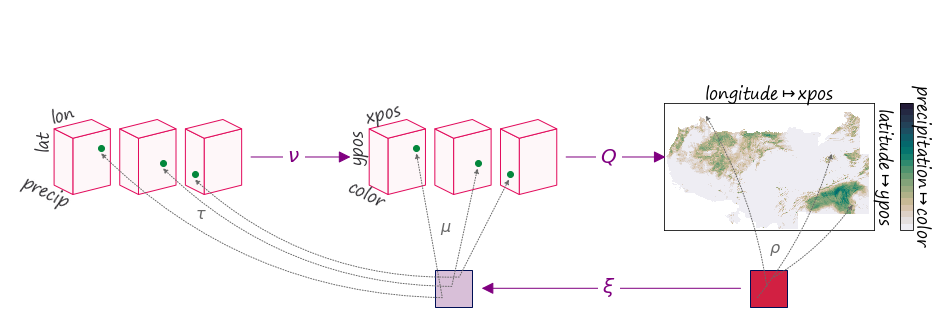

In [12]:
fig, axd = plt.subplot_mosaic([['E', 'V', 'H']], figsize=(16,12))

axd['E'].set(xlim=(-0.2,1.2), ylim=(-0.2,1.5), aspect='equal')
axd['V'].set(xlim=(-0.2,1.2), ylim=(-0.2,1.5), aspect='equal')
axd['H'].set(xlim=(-.2,1.2), ylim=(-0.2,1.5), aspect='equal')

    

r = mpatches.Rectangle((0.4,-0.1), .2, .2, facecolor='#D8BFD8', edgecolor='C0')
s = axd['V'].add_patch(r)

r2 = mpatches.Rectangle((0.4,-0.1), .2, .2, facecolor='C1', edgecolor='C0')
s = axd['H'].add_patch(r2)

smile = mpatches.Circle((.5,0), radius=.075, 
                        facecolor=facecolor, edgecolor='C1', hatch='Ox')
                          

x = [.3, .63, .80]
y = [.75, .67, .61]
xi = [.44,.49, .53]
yi = np.array([.05, .11, .16])-.1
imap = [(40.7128, -74.0060%360), (31.7683, 35.2137), (-40.9006, 174.8860)]
imap = [(0.6,0.8), (0.9,.2), (.2,0.9)]

axd['E'].scatter(x,y, color=dc, zorder=10)
axd['V'].scatter(x,y, color=dc, zorder=10)


#data = ds['data'].mean('time')
axsub = axd['H'].inset_axes([.1, .3, .8, .4] )
axcub = axd['H'].inset_axes([1, .3, .05, .4])
#im = data.plot(ax=axsub, cmap='Greens', add_colorbar=False)
#im = axsub.imshow(data, cmap=cmap, norm=norm)
im = axsub.pcolormesh(dx, dy, data, cmap=cmap, norm=norm)
cb = plt.colorbar(im, cax=axcub, ticks=[],fraction=35)

offsets = [-.05, .3, .65]
for i, off in enumerate(offsets):

    verts = np.array([[[.2,.4], [.2,.7], [.4, .75], [.4,.45]],
                 [[.1,.75],[.1,.45],[.2,.4],[.2,.7]],
                 [[.1, .75], [.3, .8],[.4, .75], [.2,.7]]])+[off, +.1]
 
    pe = mcollections.PolyCollection(verts, edgecolor=fcolor, facecolor=fc )
    axd['E'].add_collection(pe)

    pv = mcollections.PolyCollection(verts, edgecolor=fcolor, facecolor=fc)
    axd['V'].add_collection(pv)

    a1 = mpatches.FancyArrowPatch((xi[i], yi[i]), (x[i],y[i]-.02), arrowstyle="-|>",  
                                  linestyle=':', mutation_scale=10, color=oc)
    axd['V'].add_patch(a1)
    
    a2 = mpatches.ConnectionPatch(xyA=(xi[i],yi[i]), coordsA=axd['V'].transData,
                      xyB=(x[i],y[i]-.03), coordsB=axd['E'].transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=-.2",
                                 linestyle=':', color=oc)
    fig.add_artist(a2)
    
    a3 = mpatches.ConnectionPatch(xyA=(xi[i],yi[i]), coordsA=axd['H'].transData,
                      xyB=(imap[i][1],imap[i][0]), coordsB=axsub.transAxes,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=0.1",
                                 linestyle=':', color=oc)
    fig.add_artist(a3)
    

axd['E'].annotate(r'$\tau$',(0.8, 0.37), color=oc, fontsize=lsize)
axd['V'].annotate(r'$\mu$', (.43, .3), color=oc, fontsize=lsize)
axd['H'].annotate(r'$\rho$', (.5, .19), color=oc, zorder=10, fontsize=lsize)

yl=0
a3 = mpatches.ConnectionPatch(xyA=(0.35,yl), coordsA=axd['H'].transData,
                      xyB=(.65, yl), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a3)
atext_kw = {'color':ac, 'va':'center', 'ha':'center', 'zorder':10, 'bbox':{'color':'white'}, 'fontsize':20}
fig.text(1.325, a3.xy1[1], r'$\xi$', transform=axd['V'].transData, **atext_kw)

a4 = mpatches.ConnectionPatch(xyA=(1.1,.7), coordsA=axd['E'].transData,
                      xyB=(-.05, .7), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a4)
fig.text(1.325, a4.xy1[1], r'$\nu$', transform=axd['E'].transData, **atext_kw)

a5 = mpatches.ConnectionPatch(xyA=(1.1,.7), coordsA=axd['V'].transData,
                      xyB=(-0.05, .7), coordsB=axd['H'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a5)
fig.text(1.325, a5.xy1[1], r'$Q$', transform=axd['V'].transData, **atext_kw)


xy, yy = verts[1,1]
xx, yx = verts[1,0]
zx, zy = verts[2,1]
ax, ay = verts[0,0]
xshift = offsets[-1]-offsets[0]
xa = np.arctan((zy-yx)/(zx-xx))*180/np.pi
za = np.arctan((ay-yy)/(ax-xy))*180/np.pi
for (n, xtx, ytx,ztx) in [('E', 'lon', 'lat', 'precip'), ('V', 'xpos', 'ypos', 'color')]:
    #axd[n].text(.04,.89, xtx, rotation=12,)
    #axd[n].text(-.06,.69, ytx, rotation=90)
    #axd[n].text(-.06,.39, ztx, rotation=-35)
    axd[n].text(xx-xshift, yx, xtx, ha='left', va='bottom', rotation=xa,
                rotation_mode='anchor', transform_rotates_text=True, fontsize=lsize)
    axd[n].text(xy-xshift, yx, ytx, rotation=90, ha='right', va='bottom',
               rotation_mode='anchor', transform_rotates_text=True, fontsize=lsize)
    axd[n].text(ax-xshift, ay, ztx, ha='right', va='top', rotation=za, 
               rotation_mode='anchor', transform_rotates_text=True, fontsize=lsize)


cb.set_label('precipitation'+r'$\mapsto$'+'color', rotation=270, labelpad=20, fontsize=lsize)
axsub.xaxis.set_label_position('top')
axsub.yaxis.set_label_position('right')
axsub.set_xlabel('longitude'+r'$\mapsto$'+'xpos', fontsize=lsize)
axsub.set_ylabel('latitude'+r'$\mapsto$'+'ypos', rotation=270, labelpad=21, fontsize=lsize)
axsub.set(xticklabels=[], yticklabels=[]) 
axsub.tick_params(length=0)
for k in axd:
    axd[k].axis('off')

fig.savefig(proposal_path/"image.png", bbox_inches='tight' , facecolor='white')



In [13]:
axsub.get_xlim()

(-1902530.61073866, 3432029.38926134)